In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.datasets import load_iris    # built-in data
from sklearn.model_selection import train_test_split    # train, test 데이터 분할
# from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso # 선형 회귀 분석
# from sklearn.metrics import r2_score, mean_squared_error


# 확률을 통해 예측
from sklearn.linear_model import LogisticRegression, SGDClassifier # 로지스틱 회귀 분석 / 선형 분류
from sklearn.metrics import RocCurveDisplay, roc_auc_score

In [88]:
X, y = load_iris(return_X_y=True)
print(X.shape, y.shape)
print(X)
print(y)

(150, 4) (150,)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1

In [89]:
# 품종별로 수량을 일치화해줄 필요성이 있음! -> stratify = 기준 데이터 를 통해 수량을 균일하게 만들어줌
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10) 

print(y_test)
print(np.unique(y_test, return_counts=True))

# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
m = LogisticRegression(solver='liblinear')  # l1, l2로 노이즈를 줘 과적합을 방지    # penalty : default는 L2
# m = SGDClassifier(loss='log_loss')

m.fit(X_train, y_train)

print('train score : ', m.score(X_train, y_train))  # 1이 가장 좋은 값!
print('test score : ', m.score(X_test, y_test))
print('test pred : ', m.predict(X_test))
print('test target', y_test)

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]
(array([0, 1, 2]), array([12, 13, 13], dtype=int64))
train score :  0.9642857142857143
test score :  0.9736842105263158
test pred :  [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
test target [1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 1 1 1 0
 2]


In [90]:
print(m.coef_, m.intercept_)
print(m.predict(X_test))
# print(m.predict_proba(X_test))
print(X_test)
print(m.decision_function(X_test))

[[ 0.39290018  1.36102732 -2.12425585 -0.92019062]
 [ 0.52205527 -1.53419324  0.37077866 -1.01447023]
 [-1.69442156 -1.16444044  2.35357227  2.04617696]] [ 0.27094323  0.60188714 -0.94206978]
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
[[6.4 2.9 4.3 1.3]
 [5.5 2.6 4.4 1.2]
 [6.3 2.5 5.  1.9]
 [7.2 3.2 6.  1.8]
 [6.7 3.3 5.7 2.5]
 [5.7 2.8 4.5 1.3]
 [5.  3.3 1.4 0.2]
 [7.7 3.8 6.7 2.2]
 [7.4 2.8 6.1 1.9]
 [4.6 3.2 1.4 0.2]
 [6.1 2.9 4.7 1.4]
 [5.6 2.7 4.2 1.3]
 [4.9 2.4 3.3 1. ]
 [6.1 3.  4.6 1.4]
 [5.1 3.5 1.4 0.2]
 [6.9 3.1 5.1 2.3]
 [5.  3.  1.6 0.2]
 [6.7 3.1 4.4 1.4]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.2 2.8 4.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.9 3.1 1.5 0.1]
 [5.  2.3 3.3 1. ]
 [6.4 2.8 5.6 2.2]
 [5.2 3.4 1.4 0.2]
 [6.2 3.4 5.4 2.3]
 [6.5 3.  5.5 1.8]
 [6.5 2.8 4.6 1.5]
 [6.8 3.  5.5 2.1]
 [5.4 3.9 1.3 0.4]
 [4.4 2.9 1.4 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.  4.5 1.5]
 [5.7 2.8 4.1 1.3]
 [5.1 2.5 3.  1.1]
 [5.5 3.5 1.3 0.2]
 [5.8 2.7 5.1 1.9]]
[[ -3.

$ 오즈비(odds ratio) = p / (1-p) $

p : 성공확률

$ 로짓(logit), z = log(odds_ratio) = log(p/(1-p)) $


decision function

$ z = intercept + coef_i*x_i $ 


probability

$ p = 1/(1+e^{-z}) $  

In [91]:
# print(X_test)
# print(m.coef_)
# print(m.intercept_)

# X_test 내 샘플들의 class가 0번일 확률을 구하는 decision_function 값
t1 = X_test*m.coef_[0]
t1 = t1.sum(axis=1)
t1 = t1+m.intercept_[0]
print(t1)
print(m.decision_function(X_test))

[-3.59806438 -4.48038926 -6.2208588  -6.94676631 -7.01397034 -4.43404841
  3.56883795 -7.78875517 -7.71704185  3.27557515 -4.65765584 -3.9721644
 -2.46761527 -4.30912752  3.88033343 -5.74900413  2.73567859 -3.51243351
  3.04247558  2.890014   -5.33497039 -7.3515961   3.13693595 -2.56442798
 -7.32387128  3.78352072 -6.25300282 -6.43187397 -4.51619198 -6.5900611
  4.57100187  2.78868692  4.94453442 -4.46375112 -3.58434607 -1.70767481
  4.24991909 -6.35752901]
[[ -3.59806438  -0.23058256  -2.3828542 ]
 [ -4.48038926  -0.10164945  -0.47780314]
 [ -6.2208588   -0.01824787   1.1275709 ]
 [ -6.94676631  -0.15010771   0.93643776]
 [ -7.01397034  -1.38591742   2.39345669]
 [ -4.43404841  -0.3684462   -0.60960061]
 [  3.56883795  -1.5344781   -9.55259444]
 [ -7.78875517  -0.95583904   1.85653409]
 [ -7.71704185   0.50361149   1.50330455]
 [  3.27557515  -1.58988089  -8.75838177]
 [ -4.65765584  -0.3403347   -0.72848113]
 [ -3.9721644   -0.378466    -1.0297861 ]
 [ -2.46761527  -0.31300644  -2.22

In [93]:
print(m.predict(X_test))
print(np.argmax(m.predict_proba(X_test), axis=1))
print(m.predict_proba(X_test))

[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
[1 1 2 2 2 1 0 2 2 0 1 1 1 1 0 2 0 1 0 0 2 2 0 1 2 0 2 2 1 2 0 0 0 2 1 1 0
 2]
[[4.81216933e-02 7.99299930e-01 1.52578377e-01]
 [1.28969815e-02 5.46418375e-01 4.40684643e-01]
 [1.58331416e-03 3.95460869e-01 6.02955816e-01]
 [8.12953101e-04 3.91361151e-01 6.07825896e-01]
 [8.04112439e-04 1.79059226e-01 8.20136661e-01]
 [1.51750569e-02 5.29140382e-01 4.55684561e-01]
 [8.45729334e-01 1.54208916e-01 6.17496189e-05]
 [3.62370926e-04 2.42963704e-01 7.56673925e-01]
 [3.08622177e-04 4.32306320e-01 5.67385058e-01]
 [8.50364557e-01 1.49496789e-01 1.38653764e-04]
 [1.25217053e-02 5.53819984e-01 4.33658311e-01]
 [2.68628497e-02 5.90746669e-01 3.82390481e-01]
 [1.30714549e-01 7.06389879e-01 1.62895571e-01]
 [2.08257706e-02 5.81315948e-01 3.97858281e-01]
 [8.72458722e-01 1.27498989e-01 4.22892193e-05]
 [3.57756999e-03 3.04239167e-01 6.92183263e-01]
 [7.77278310e-01 2.22588246e-01 1.33443556e-04]
 [5.99115626e-02 8.0785820

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False]
[False False  True  True  True False False  True  True False False False
 False False 

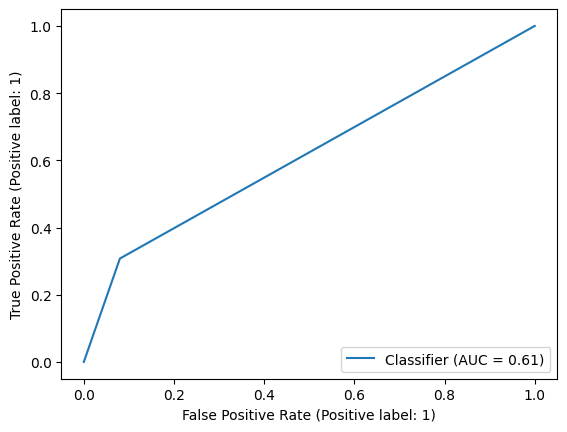

In [106]:
# 분류기의 척도 : confusion matrix (혼동행렬)

# confusion matrix

X, y = load_iris(return_X_y=True)

# 모두 일치하는 케이스 => 결과값이 1
# X = X[:-50]
# y = y[:-50]
# print(y)

# 1이면 True, 아니면 False
y = y==1
print(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=10) 

print(y_test)
print(np.unique(y_test, return_counts=True))

# solver{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’
m = LogisticRegression(solver='liblinear') 


m.fit(X_train, y_train)

print(m.score(X_test, y_test))

RocCurveDisplay.from_predictions(y_test, m.predict(X_test))
# curve 아래 면적이 얼마나 되는지를 구해 척도를 나타냄 => AUC (max : 1.0) 높을수록 예측 정확도가 높다
# positive, negative만 있을 때 판단이 가능한다